In [23]:
%matplotlib inline
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/My Drive/Econ 484/auxiliaries'
from preamble import *

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/Econ 484/auxiliaries


### Decision trees

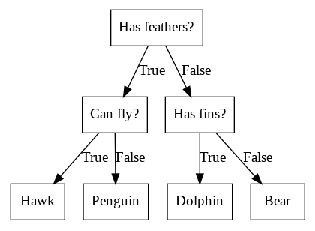

In [24]:
mglearn.plots.plot_animal_tree()

##### Building decision trees

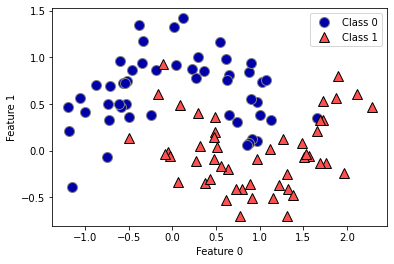

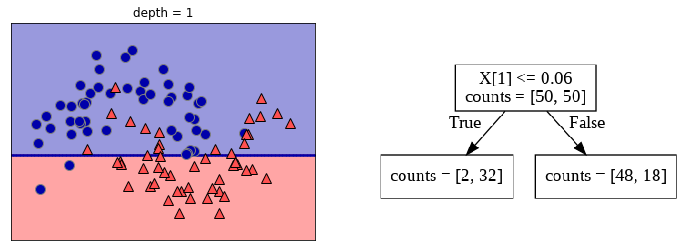

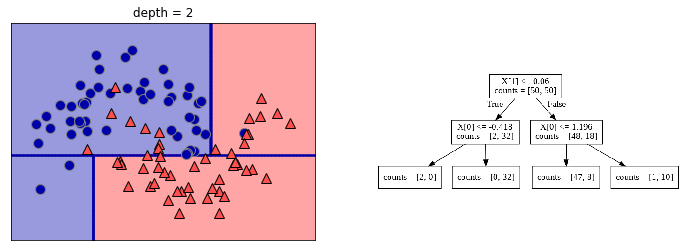

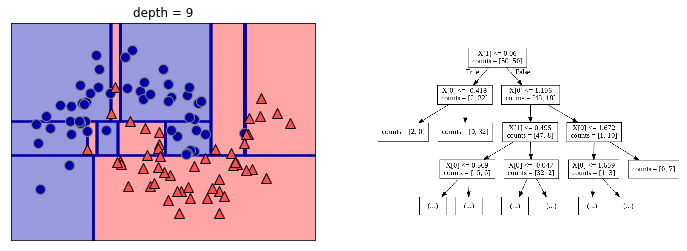

In [25]:
mglearn.plots.plot_tree_progressive()

##### Controlling complexity of decision trees

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

#if you don't have a tuning parameter specified there will be 100% accuracy on the training data but worse accuracy on the test set

Accuracy on training set: 1.000
Accuracy on test set: 0.937


In [27]:
tree = DecisionTreeClassifier(max_depth=3, min_samples_leaf = 14,random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.5f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.5f}".format(tree.score(X_test, y_test)))

#With a max depth and minimum sample observations the training is worse but test is better
#balance between training and test set accuracy indicates a goot spot in bias-variance trade-off

for i in range(1,5):
  tree = DecisionTreeClassifier(max_depth=i, min_samples_leaf = 14,random_state=0)
  tree.fit(X_train, y_train)

  print("Accuracy on training set: {:.5f}".format(tree.score(X_train, y_train)))
  print("Accuracy on test set: {:.5f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.95540
Accuracy on test set: 0.95804
Accuracy on training set: 0.92254
Accuracy on test set: 0.92308
Accuracy on training set: 0.94601
Accuracy on test set: 0.91608
Accuracy on training set: 0.95540
Accuracy on test set: 0.95804
Accuracy on training set: 0.95540
Accuracy on test set: 0.95804


#### Analyzing Decision Trees

In [28]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
                feature_names=cancer.feature_names, impurity=False, filled=True)

#this visualizes the tree that we just created

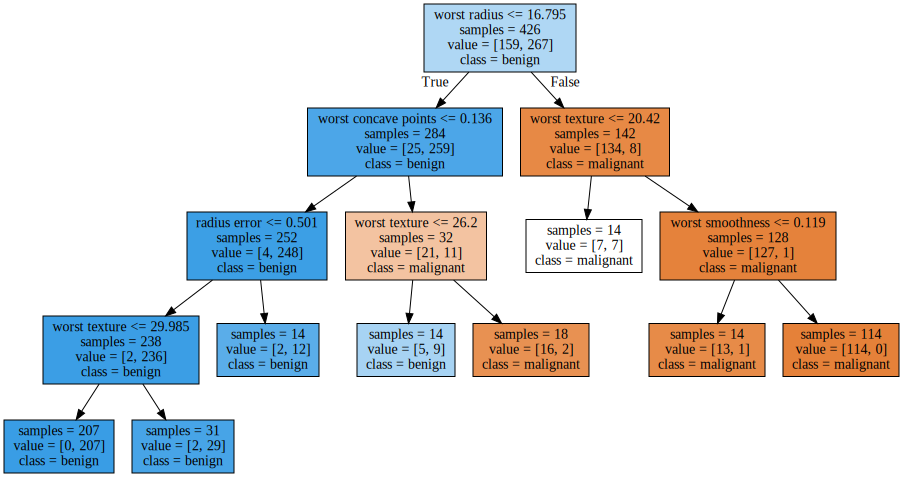

In [29]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

#### Feature Importance in trees

In [30]:
print("Feature importances:")
print(tree.feature_importances_)


#feature importance is measured by how much worse the tree would be if you removed the split
#feature importance is analogous to coefficients in regression

Feature importances:
[0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.003 0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.8   0.062 0.    0.
 0.001 0.    0.    0.134 0.    0.   ]


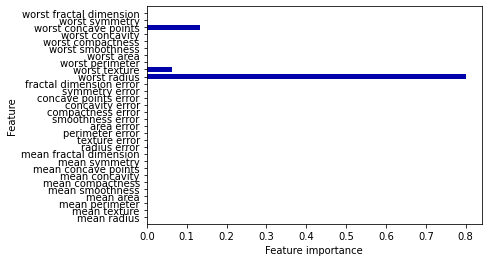

In [31]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(tree)

#this could mean that some of the variables with zero importance are redundant but are still significant if they were used by themselves

Feature importances: [0. 1.]


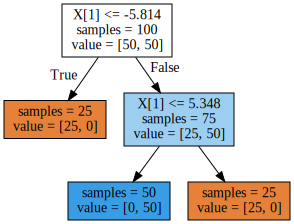

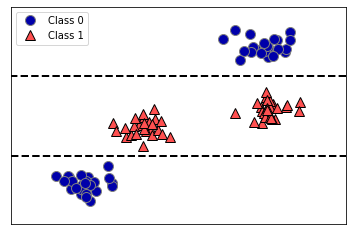

In [32]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

#this shows how a linear regression for classification wouldnt do well but a tree could

Text(0, 0.5, 'Price in $/Mbyte')

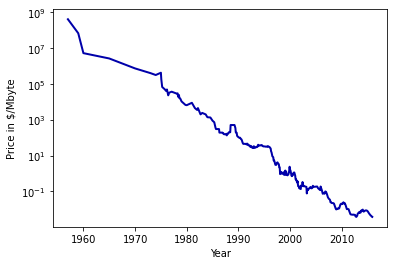

In [33]:
import os
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))

plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte")

#this is a case where a tree wouldn't do well. Extrapolation into the future with trees is not great

In [34]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
# use historical data to forecast prices after the year 2000
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# predict prices based on date
X_train = data_train.date[:, np.newaxis]
# we use a log-transform to get a simpler relationship of data to target
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor(max_depth=3).fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# predict on all data
X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# undo log-transform
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  app.launch_new_instance()


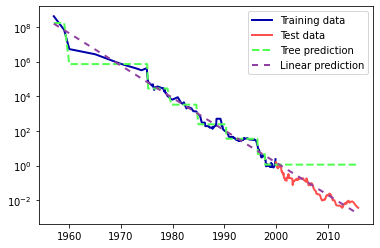

In [35]:
plt.semilogy(data_train.date, data_train.price, label="Training data")
plt.semilogy(data_test.date, data_test.price, label="Test data")
plt.semilogy(ram_prices.date, price_tree, label="Tree prediction")
plt.semilogy(ram_prices.date, price_lr, label="Linear prediction")
plt.legend()

Now load the mortgage application data from last time, and compare a decision tree to logistic regression, using the ROC AUC on the test set as the criterion

In [47]:
#this code is rushed and kind of sucky so redo this after make sure the logit stuff works and then check tree classifications with auc
mortgagedata=pd.read_csv('/content/gdrive/My Drive/Econ 484/datasets/mortgage.csv')
y = mortgagedata.loc[:,'deny']
X = mortgagedata.loc[:,['loan_val','p_irat','ccred','hse_inc','loan_val','mcred','pubrec','denpmi','selfemp','single','hischl','probunmp','condo','ltv_med']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [48]:
tree = DecisionTreeClassifier(max_depth=17,min_samples_leaf=26).fit(X_train,y_train)
phat_test = tree.predict_proba(X_test)
phat_test = phat_test[:1]

tpr=[0]*100
fpr=[0]*100
for i in range(100):
     tau=i/100
     yhat_test=phat_test>=tau
     tp=sum(yhat_test*y_test.to_numpy().reshape(-1,1)) 
     p=sum(y_test)
     tpr[i]=tp/p
     n=sum(1-y_test)
     fp=sum(yhat_test*(1-y_test.to_numpy().reshape(-1,1)))
     fpr[i]=fp/n
###
from sklearn import metrics
metrics.auc()

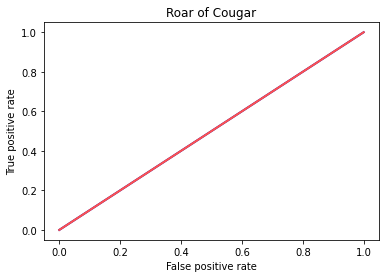

In [49]:
fig = plt.figure()
ax = plt.axes()
ax.plot(fpr,tpr);
plt.title("Roar of Cougar")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate");